## Flagging

- Replacing the NA by artitrary values when data is not MCAR

- We flag NA by a constant value 

- What value should we choose?

### Pros

- Easy 
- Captures MAR/MNAR 

### Cons

- Distorts distributions 
- Hit and trial on the value of imputation
- May create outliers 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/FeatureEngineering/train.csv")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Titanic

In [3]:
data = data[['Age', 'Fare','Survived']]
data.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [4]:
data.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare']], data['Survived'], test_size=0.2)
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [6]:
def impute(df, variable, value, text):
    df[variable+"_"+text] = df[variable].fillna(value)

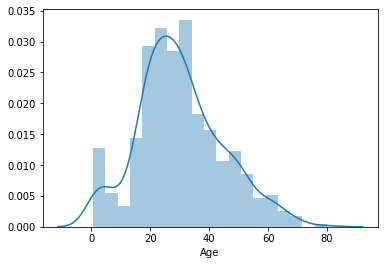

In [7]:
sns.distplot(X_train['Age'])

In [8]:
from sklearn.impute import SimpleImputer
obj = SimpleImputer(missing_values = np.nan, strategy= 'constant',  fill_value = 100)
X_train_0 = obj.fit_transform(X_train)
X_test_0 = obj.transform(X_test)

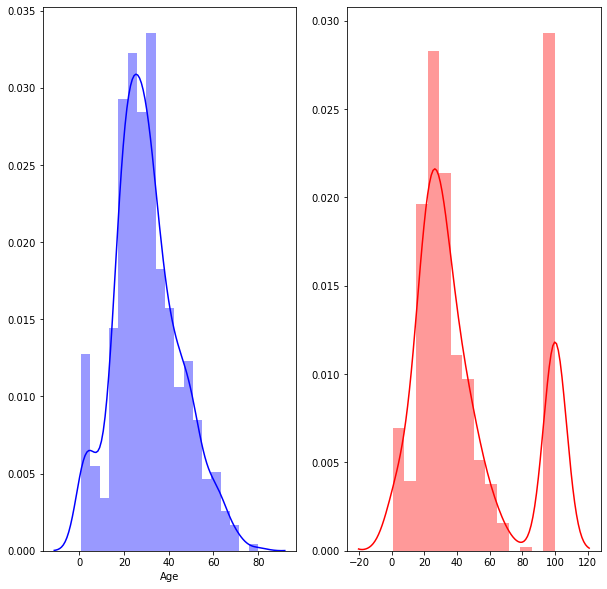

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.distplot(X_train['Age'], ax = ax[0], color='blue')
sns.distplot(X_train_0[:,0], ax = ax[1], color='red')

In [10]:
from sklearn.impute import SimpleImputer
obj = SimpleImputer(missing_values = np.nan, strategy= 'mean')
X_train_mean = obj.fit_transform(X_train)
X_test_mean = obj.transform(X_test)

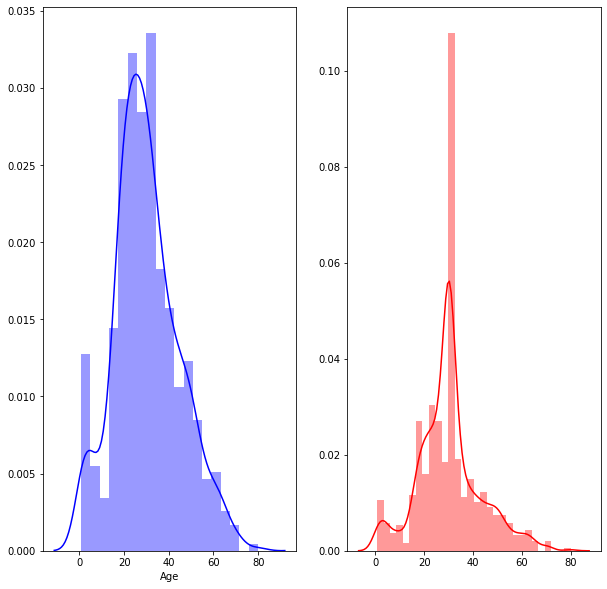

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.distplot(X_train['Age'], ax = ax[0], color='blue')
sns.distplot(X_train_mean[:,0], ax = ax[1], color='red')

In [12]:
from sklearn.impute import SimpleImputer
obj = SimpleImputer(missing_values = np.nan, strategy= 'median')
X_train_median = obj.fit_transform(X_train)
X_test_median = obj.transform(X_test)

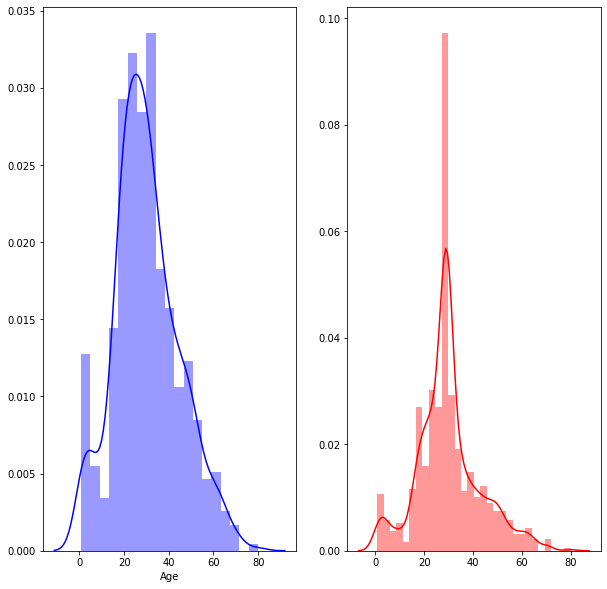

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.distplot(X_train['Age'], ax = ax[0], color='blue')
sns.distplot(X_train_median[:,0], ax = ax[1], color='red')

In [14]:
from sklearn.impute import SimpleImputer
obj = SimpleImputer(missing_values = np.nan, strategy= 'most_frequent')
X_train_mode = obj.fit_transform(X_train)
X_test_mode = obj.transform(X_test)

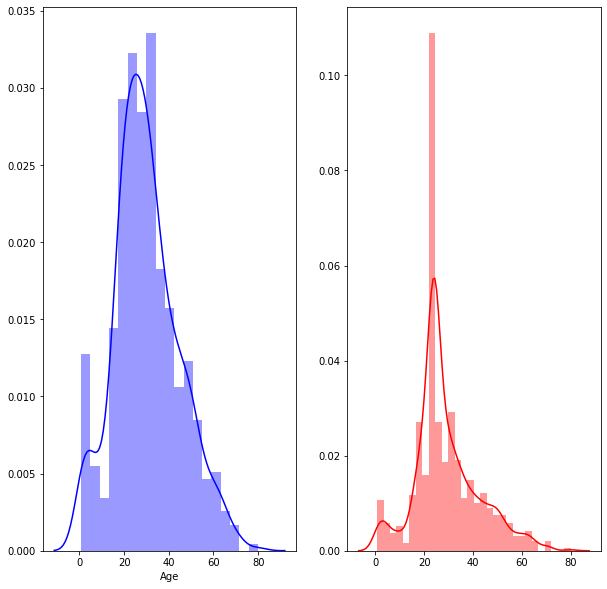

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.distplot(X_train['Age'], ax = ax[0], color='blue')
sns.distplot(X_train_mode[:,0], ax = ax[1], color='red')

In [16]:
print('Std original: ', X_train['Age'].std())
print('Std 0: ', X_train_0[:,0].std())
print('Std mean: ', X_train_mean[:,0].std())
print('Std median: ', X_train_median[:,0].std())
print('Std mode: ', X_train_mode[:,0].std())

Std original:  14.471464763027239
Std 0:  31.11416354781033
Std mean:  12.86846341183436
Std median:  12.87748874560301
Std mode:  13.111147241599808


### Model performance 

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6145251396648045
0.6033519553072626
0.6033519553072626
0.5977653631284916


In [19]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6033519553072626
0.6033519553072626
0.6089385474860335
0.6145251396648045


In [20]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6033519553072626
0.6033519553072626
0.6089385474860335
0.6145251396648045


In [21]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6424581005586593
0.6089385474860335
0.6089385474860335
0.6089385474860335


In [22]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6424581005586593
0.6703910614525139
0.6759776536312849
0.6703910614525139


In [23]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.37988826815642457
0.3854748603351955
0.3743016759776536
0.6145251396648045


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6815642458100558
0.664804469273743
0.659217877094972
0.664804469273743


In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6424581005586593
0.6368715083798883
0.6256983240223464
0.6312849162011173


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6927374301675978
0.664804469273743
0.6815642458100558
0.6815642458100558


In [27]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6703910614525139
0.6033519553072626
0.39106145251396646
0.6033519553072626


In [28]:
from sklearn.linear_model import Perceptron
classifier = Perceptron()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.39106145251396646
0.5754189944134078
0.6033519553072626
0.6368715083798883


In [29]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6089385474860335
0.6089385474860335
0.6089385474860335
0.6089385474860335


In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6480446927374302
0.6145251396648045
0.6312849162011173
0.6480446927374302
